# Create detrended CHEOPS light curves

**Author:** Hannu Parviainen<br>
**Last edited:** 10.1.2022

In [1]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from astropy.table import Table
from src import CHEOPSLPF, read_mcmc

In [3]:
lpf = CHEOPSLPF('c')

In [4]:
df = read_mcmc('results/02b_cheops_emission_and_constrained_ev.nc')

In [17]:
cs = [i for i,c in enumerate(df.columns) if 'lm_i_' in c]

In [9]:
import seaborn as sb

In [28]:
df.columns.values

array(['tc', 'p', 'rho', 'b', 'secw', 'sesw', 'k2', 'oev', 'aev_cheops',
       'adb_cheops', 'log10_ted_cheops', 'log10_ten_cheops', 'teo_cheops',
       'ag_cheops', 'q1_cheops', 'q2_cheops', 'wn_loge_0', 'lm_i__0',
       'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4', 'lm_s__0_5',
       'lm_s__0_6', 'lm_s__0_7', 'lm_s__0_8', 'lm_s__0_9', 'lm_s__0_10',
       'lm_s__0_11', 'lm_s__0_12', 'lm_i__0', 'lm_s__0_1', 'lm_s__0_2',
       'lm_s__0_3', 'lm_s__0_4', 'lm_s__0_5', 'lm_s__0_6', 'lm_s__0_7',
       'lm_s__0_8', 'lm_s__0_9', 'lm_s__0_10', 'lm_s__0_11', 'lm_s__0_12',
       'lm_s__0_13', 'lm_s__0_14', 'lm_s__0_15', 'lm_s__0_16',
       'lm_s__0_17', 'lm_s__0_18', 'lm_s__0_19', 'lm_s__0_20',
       'lm_s__0_21', 'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3',
       'lm_s__0_4', 'lm_s__0_5', 'lm_s__0_6', 'lm_s__0_7', 'lm_s__0_8',
       'lm_s__0_9', 'lm_s__0_10', 'lm_s__0_11', 'lm_s__0_12',
       'lm_s__0_13', 'lm_s__0_14', 'lm_s__0_15', 'lm_s__0_16',
       'lm_s__0_17', 'lm

In [24]:
1e6*(df.iloc[:,cs] - 1)

,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0,lm_i__0
0,347.718913,298.509233,318.093590,298.339674,295.385139,458.873364,210.066962,220.847595
1,356.168778,294.499039,315.268204,300.035087,296.431488,458.497416,209.507326,212.642551
2,346.673019,280.341785,308.014746,293.415256,287.995100,442.867002,200.103295,213.623036
3,334.569212,307.400011,308.425165,292.058629,284.623230,436.793164,200.543249,229.794279
4,324.077983,317.854623,306.712897,300.343026,281.982722,430.574498,214.116645,245.612495
...,...,...,...,...,...,...,...,...
59995,324.584030,347.755737,256.086163,324.402967,264.020604,407.681667,285.671997,324.799298
59996,332.622775,349.587195,262.881865,328.728971,268.877006,409.773825,294.427424,332.948705
59997,324.077995,354.295829,271.125940,338.600202,255.228429,391.965046,293.261784,332.776029
59998,316.153388,355.652312,271.832496,337.547423,246.609868,401.958917,286.873739,333.893524


<AxesSubplot:>

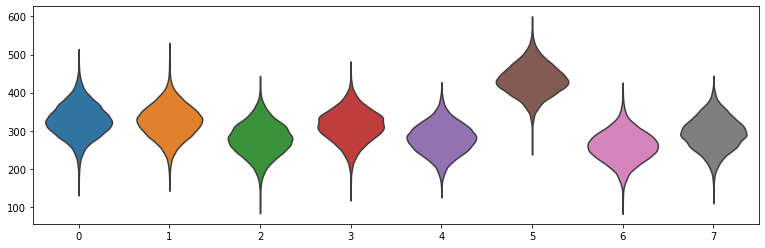

In [26]:
sb.violinplot(data=1e6*(df.iloc[:,cs].values-1), inner=None)

In [16]:
pvp = permutation(df.values)[:400]

In [22]:
bl = median(lpf.baseline(pvp), 0)

In [23]:
df = pd.DataFrame(transpose([lpf.timea, lpf.ofluxa/bl, bl]),
            columns='time_bjd flux_cor trend'.split())
df['visit'] = lpf.lcids + 1

In [24]:
tb = Table.from_pandas(df)

In [25]:
tb.write('data/cheops_final_detrended.fits', overwrite=True)

---

<center>&copy;2022 Hannu Parviainen</center>